<a href="https://colab.research.google.com/github/LeeYuuuan/ECGR_5105_001_Assignment_1/blob/main/ECGR_5105_Assignment_1_Liyuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Information
- Assignment 1
- Name: Liyuan Zhang
- Student ID: 801432783
- Github Link: https://github.com/LeeYuuuan/ECGR_5105_001_Assignment_1

# Problem 1: Runs Linear Regression with Gradient Decent Algorithm for Each Explanatory Variable in Isolation.

In [76]:
def linear_regression_explanatory_variable(x, y, learning_rate, num_iterations, print_loss=True):
    """
    This function runs linear regression with gradient decent algorithm for each explanatory variable in isolation.
    Args:
        x: variable
        y: target
        learning_rate: learning rate
        num_iterations: number of iterations
    Returns:
        w: weight
        b: bias

    """
    w = 0.0
    b = 0.0
    n = len(x)
    losses = []
    for i in range(num_iterations):

        y_pred = w * x + b

        loss = np.mean((y - y_pred) ** 2)
        dw = -(2 / n) * np.sum(x * (y - y_pred))
        db = -(2 / n) * np.sum(y - y_pred)

        w = w - learning_rate * dw
        b = b - learning_rate * db
        losses.append(loss)
    if print_loss:
        print(f"after {num_iterations} iterations, Loss: {loss}, Weight: {w}, Bias: {b}")
    return w, b, losses

def plot_linear_regression(x, y, w, b, losses):
    """
    This function plots the linear regression.
    Args:
        x: explanatory variable
        y: response variable
        w: weight
        b: bias
    Returns:
        None
    """
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='orange', s=5, label='data')
    plt.plot(x, w * x + b, color='red', label=f'y = {w:.2f}x + {b:.2f}')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression')
    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss vs Iterations')
    plt.show()


## load data

In [102]:
data = pd.read_csv("D3.csv")
X = []
for i in range(1, 4):
    X.append(data[f"X{i}"].values)
y = data["Y"].values

## Model for $X_1$, Y

after 1000 iterations, Loss: 1.969986328682295, Weight: -2.038027745160941, Bias: 5.927155278592221


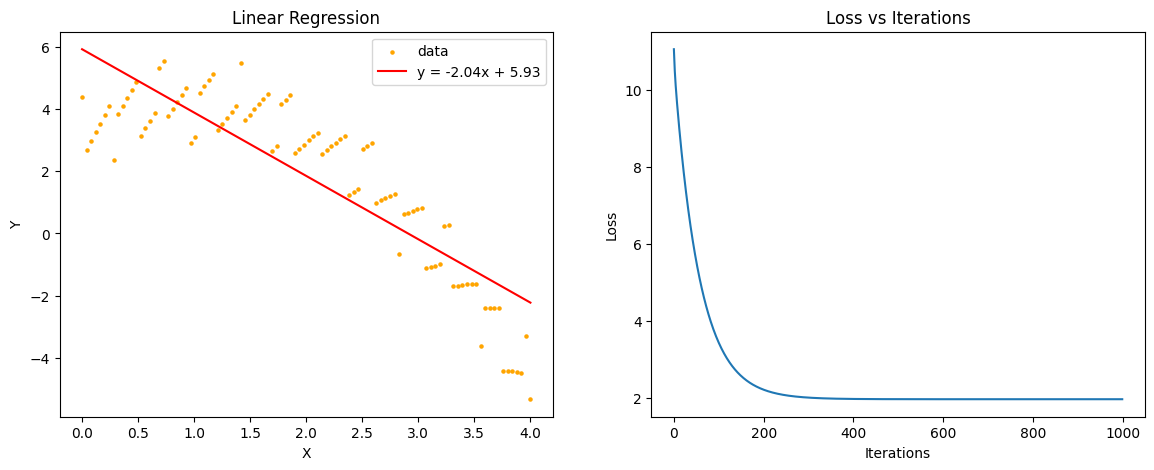

In [78]:
w_1, b_1, losses_1 = linear_regression_explanatory_variable(X[0], y, 0.02, 1000)
plot_linear_regression(X[0], y, w_1, b_1, losses_1)

## Model for $X_2$, Y

after 1000 iterations, Loss: 7.198732037312319, Weight: 0.5576314718695858, Bias: 0.7359991223696033


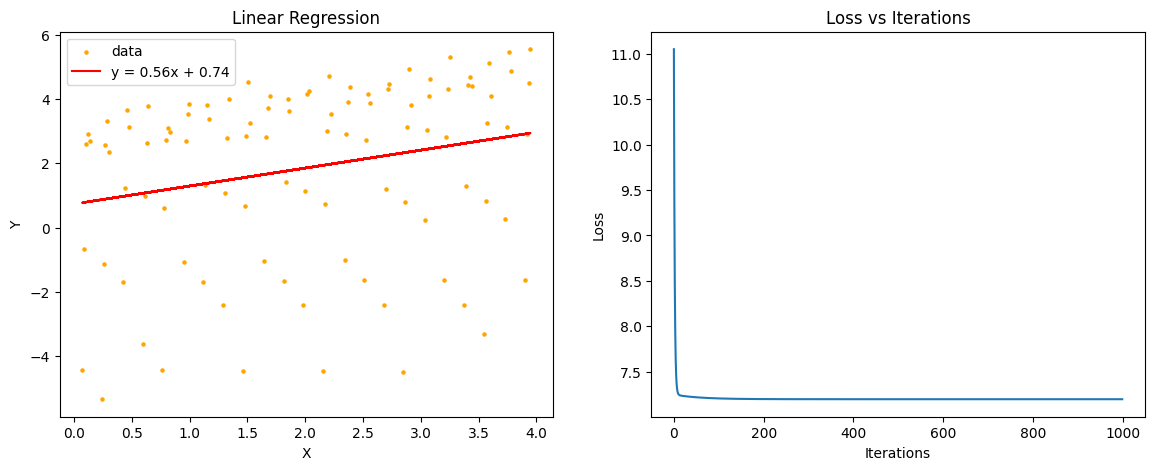

In [79]:
w_2, b_2, losses_2 = linear_regression_explanatory_variable(X[1], y, 0.02, 1000)
plot_linear_regression(X[1], y, w_2, b_2, losses_2)

## Model for $X_3$, Y

after 1000 iterations, Loss: 7.258902275893605, Weight: -0.5203573372692882, Bias: 2.8711046606646056


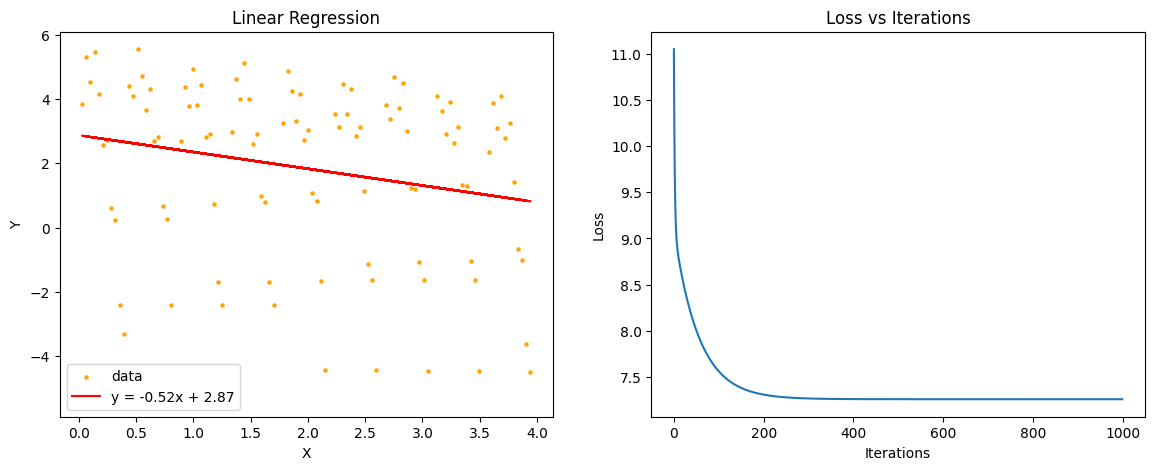

In [80]:
w_3, b_3, losses_3 = linear_regression_explanatory_variable(X[2], y, 0.02, 1000)
plot_linear_regression(X[2], y, w_3, b_3, losses_3)


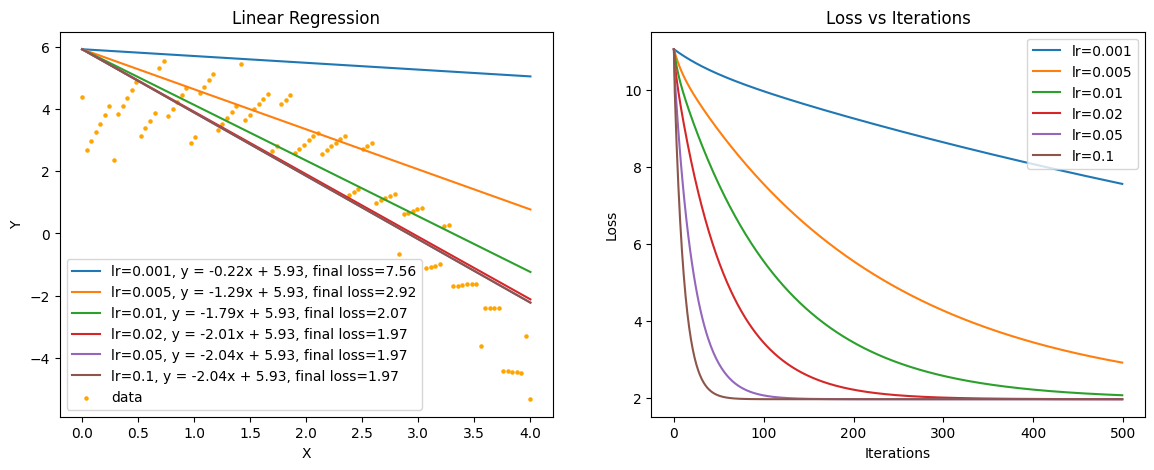

In [129]:
# according to the results, I will test Problem 1.4 using X₁, as it can achieve lowest loss
# and there is a moderate linear correlation between X₁ and y based on the figure.
ws = []
bs = []
losses = []
lr_set = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1]
for lr in lr_set:

    w, b, loss = linear_regression_explanatory_variable(X[0], y, lr, 500, print_loss=False)
    ws.append(w)
    bs.append(b)
    losses.append(loss)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)

for i, (lr, w) in enumerate(zip(lr_set, ws)):
    plt.plot(X[0], w * X[0] + b, label=f"lr={lr}, y = {w:.2f}x + {b:.2f}, final loss={losses[i][-1]:.2f}")
plt.legend()
plt.scatter(X[0], y, color='orange', s=5, label='data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.subplot(1, 2, 2)
for lr, loss in zip(lr_set, losses):
    plt.plot(loss, label=f"lr={lr}")
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()

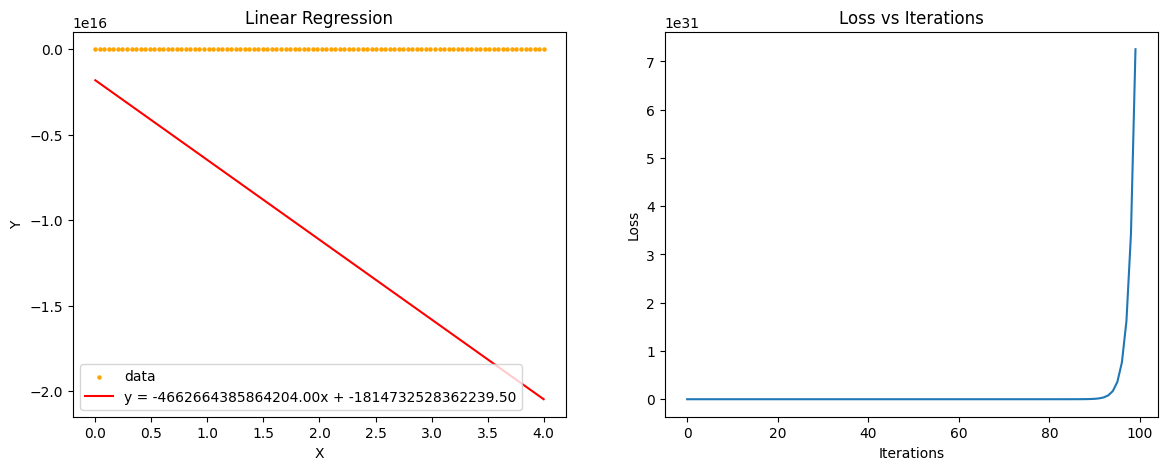

In [89]:
# test higher learning rate: 0.2
w, b, loss = linear_regression_explanatory_variable(X[0], y, 0.2, 100, print_loss=False)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[0], y, color='orange', s=5, label='data')
plt.plot(X[0], w * X[0] + b, color='red', label=f'y = {w:.2f}x + {b:.2f}')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.subplot(1, 2, 2)
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()

##Concolusion:
1. The best Linear model is:

 $y= -2.04x + 5.93$

 i.e.  $w = -2.04, b = 5.93$

3. $X_1$ has the lower loss for explaining the output Y
4. Impact of Different Learning Rates on Convergence
 - For Higher Learning Rate (e.g., higher than 0.1), it will accelerate convergence progress but may reduce precision.
 - Lower Learning Rate (e.g., lower than 0.01), may lead to slower convergence, and if the number of iterations is insufficient, the model might not fully converge.
 - If the learning rate is too large (e.g., much greater than 0.1), the gradient updates become excessively large, causing the model parameters to overshoot the optimal values. Instead of decreasing, the loss function starts to increase, leading to divergence.


# Problem 2: Run Linear Regression with Gradient Descent Algorithm using all variables.

In [116]:
def linear_regression_all_variables(X, y, learning_rate, num_iterations, print_loss=True):
    """
    This function runs linear regression with gradient decent algorithm for all
    explanatory variables.
    Args:
        X: variables
        y: target
        learning_rate: learning rate
        num_iterations: number of iterations
    Returns:
        w: weight
        b: bias

    """
    w = np.zeros(X.shape[1])
    b = 0.0
    n = len(X)
    losses = []
    for i in range(num_iterations):
        y_pred = np.dot(X, w) + b
        loss = np.mean((y - y_pred) ** 2)

        dw = -(2 / n) * np.dot(X.T, (y - y_pred))
        db = -(2 / n) * np.sum(y - y_pred)

        w = w - learning_rate * dw
        b = b - learning_rate * db
        losses.append(loss)

    return w, b, losses

def plot_loss_vs_iterations(losses, w, b):
    """
    This function plots the loss vs iterations.
    Args:
        losses: list of losses
    Returns:
        None
    """
    plt.plot(losses, label=f"y = {w[0]:.2f}x₁ + {w[1]:.2f}x₂ + {w[2]:.2f}x₃ + {b:.2f}")
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss vs Iterations')
    plt.show()


In [105]:
# get data
Xs = np.array(X)
Xs = Xs.T

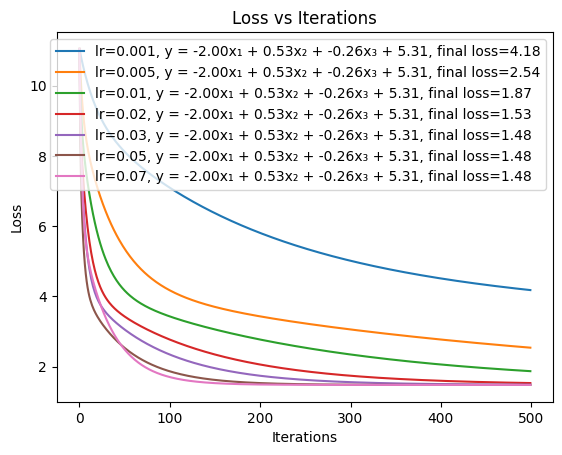

In [124]:
# test different learning rate
ws = []
bs = []
losses = []
lr_set = [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07]
for lr in lr_set:
    w, b, loss = linear_regression_all_variables(Xs, y, lr, 500, print_loss=False)
    ws.append(w)
    bs.append(b)
    losses.append(loss)

# plot losses
for lr, loss in zip(lr_set, losses):
    plt.plot(loss, label=f"lr={lr}, y = {ws[-1][0]:.2f}x₁ + {ws[-1][1]:.2f}x₂ + {ws[-1][2]:.2f}x₃ + {bs[-1]:.2f}, final loss={loss[-1]:.2f}")
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()

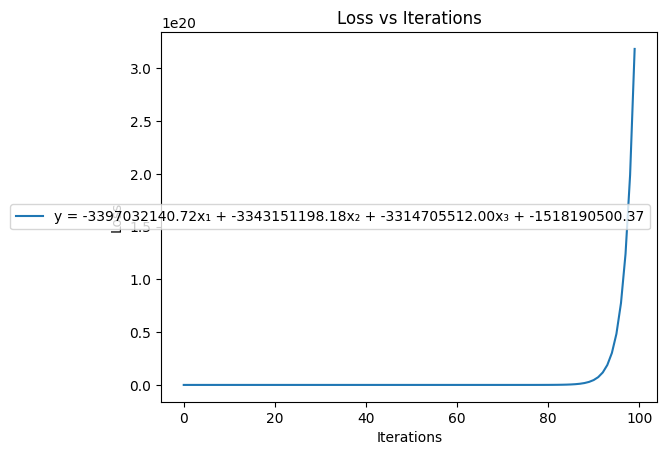

In [118]:
# if the learning rate is too large...
w, b, loss = linear_regression_all_variables(Xs, y, 0.08, 100, print_loss=False)
plot_loss_vs_iterations(loss, w, b)

## predict

In [133]:
w_final, b_final, loss_final = linear_regression_all_variables(Xs, y, 0.03, 1000, print_loss=True)
predict_x_1 = np.array([1, 1, 1])
predict_x_2 = np.array([2, 0, 4])
predict_x_3 = np.array([3, 2, 1])
y_1 = np.dot(predict_x_1, w_final) + b_final
y_2 = np.dot(predict_x_2, w_final) + b_final
y_3 = np.dot(predict_x_3, w_final) + b_final
y_1 = round(y_1, 2)
y_2 = round(y_2, 2)
y_3 = round(y_3, 2)
print(f"y = {w_final[0]:.2f}x₁ + {w_final[1]:.2f}x₂ + {w_final[2]:.2f}x₃ + {b_final:.2f}")
print(f"x = {predict_x_1}, y = {y_1}")
print(f"x = {predict_x_2}, y = {y_2}")
print(f"x = {predict_x_3}, y = {y_3}")


y = -2.00x₁ + 0.53x₂ + -0.26x₃ + 5.30
x = [1 1 1], y = 3.57
x = [2 0 4], y = 0.24
x = [3 2 1], y = 0.1


##Concolusion:
1. THe best Linear model is:

 $y= -2x_1 + 0.53x_2 - 0.26 x_3 + 5.31$

 i.e.  $w_1 = -2, w_2 = 0.53, w_3 = -0.26, b = 5.31$

3. Impact of Different Learning Rates on Convergence
 - For relatively higher learning rate (e.g., higher than 0.05), it will accelerates convergence progress but may reduce precision.
 - Relatively lower learning rate (e.g., lower than 0.01), may lead to slower convergence, and if the number of iterations is insufficient, the model might not fully converge.
 - If the learning rate is too large (e.g., much greater than 0.1, for this problem, even larger than 0.08 will cause divergence), the gradient updates become excessively large, causing the model parameters to overshoot the optimal values. Instead of decreasing, the loss function starts to increase, leading to divergence.
4. Prediction Resutls:
 - $x = (1, 1, 1), y = 3.57$

 - $x = (2, 0, 4), y = 0.24$

 - $x = (3, 2, 1), y = 0.1$

